In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups

# Load the Twenty Newsgroups dataset from UCI
twenty_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))


In [2]:
# Preprocess the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
X = vectorizer.fit_transform(twenty_train.data)


In [3]:
# Apply Latent Dirichlet Allocation (LDA) for topic modeling
lda = LatentDirichletAllocation(n_components=20, max_iter=10, learning_method='online', learning_offset=50., random_state=0)
lda.fit(X)

# Get the topic distributions for each document
doc_topics = lda.transform(X)


In [4]:
# Apply K-means clustering to the topic distributions
kmeans = KMeans(n_clusters=20, random_state=0).fit(doc_topics)

# Evaluate the clustering performance
silhouette = silhouette_score(doc_topics, kmeans.labels_)
ari = adjusted_rand_score(twenty_train.target, kmeans.labels_)
print("Silhouette score:", silhouette)
print("Adjusted Rand Index:", ari)


Silhouette score: 0.49618122298090106
Adjusted Rand Index: 0.07603533861065316


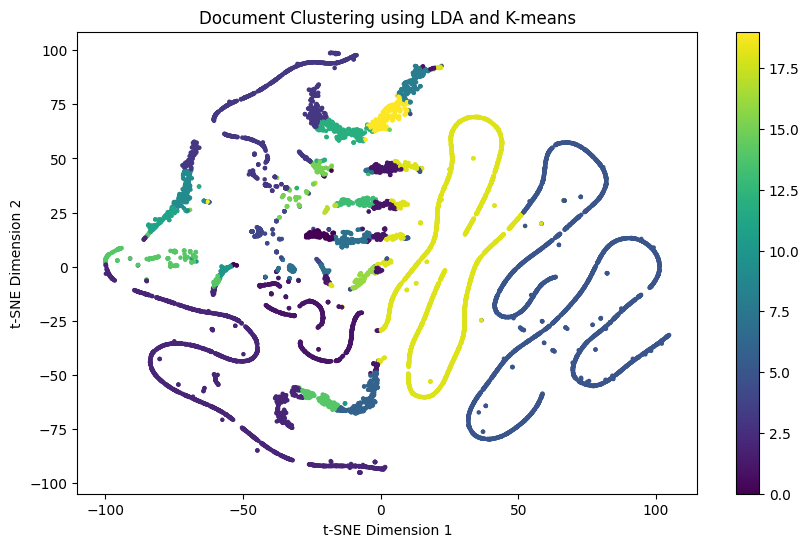

In [6]:
# Visualize the clustering results using t-SNE
tsne = TSNE(n_components=2, random_state=0)
doc_topics_2d = tsne.fit_transform(doc_topics)

plt.figure(figsize=(10, 6))
plt.scatter(doc_topics_2d[:, 0], doc_topics_2d[:, 1], c=kmeans.labels_, cmap='viridis', s=5)
plt.colorbar()
plt.title("Document Clustering using LDA and K-means")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


In [7]:
# Alternatively, apply K-means directly on the TF-IDF vectors
kmeans_tfidf = KMeans(n_clusters=20, random_state=0).fit(X)
silhouette_tfidf = silhouette_score(X, kmeans_tfidf.labels_)
ari_tfidf = adjusted_rand_score(twenty_train.target, kmeans_tfidf.labels_)
print("Silhouette score (K-means on TF-IDF):", silhouette_tfidf)
print("Adjusted Rand Index (K-means on TF-IDF):", ari_tfidf)


Silhouette score (K-means on TF-IDF): -0.020394589953866858
Adjusted Rand Index (K-means on TF-IDF): 0.03291028855614847
